## Anomaly Detection
## Question: 
Implement a function that identifies outliers in a dataset using statistical measures like mean and standard deviation. 
### Follow-up: 
Explain how your algorithm would handle large-scale data and how to optimize it.

### 1. Statistical Method - Z-Score

data point with a z-score greater than the specified threshold is considered an outlier. 
#### Algorithm:
1. **Calculate the Mean ($\mu $)**: Compute the average of the dataset.
2. **Calculate the Standard Deviation ($\sigma $)**: Measure the spread of the data around the mean.
3. **Compute Z-Scores ($Z $)**: For each data point ($x $), calculate the Z-score.
The Z-score indicates how many standard deviations a data point is from the mean. The Z-Score for a data point is calculated using the formula:

$$
Z = \frac{x - \mu}{\sigma}
$$

4. **Set Threshold**: Define a threshold (e.g., 3). Data points with absolute Z-scores greater than the threshold are considered outliers.
#### Use Case:
+ Best suited for data that is **normally distributed**.
+ Sensitive to **extreme outliers**, as they can inflate the mean and standard deviation.

In [1]:
import numpy as np 

def detect_outliers_z_score(data, threshold):
    mean = np.mean(data)
    #print('mean=', mean)
    std_dev = np.std(data)
    #print('standard deviation=', std_dev)
    z_score = [(x - mean)/std_dev for x in data]
    #print('Z score=', z_score)
    return [i for i,z in enumerate(z_score) if abs(z) > threshold]

#---------------------
#Example
#---------------------
data = [10, 12, 12, 11, -15, 13, 15, 100, 11, 12, 14, 120,-10, 9]
outliers = detect_outliers_z_score(data, 0.9)
for index in outliers:
    print(f"Index: {index}, Value: {data[index]}")

Index: 4, Value: -15
Index: 7, Value: 100
Index: 11, Value: 120


### 2. Statistical Method - IQR (Interquartile Range)
Data points outside the range defined by lower bound and upper bound are considered outliers.
#### Algorithm:
1. **Calculate Quartiles**:
   - **Q1 (25th Percentile)**: Median of the lower half of the dataset.
   - **Q3 (75th Percentile)**: Median of the upper half of the dataset.

2. **Calculate IQR**:
   $$
   \text{IQR} = Q3 - Q1
   $$
   - Measures the range of the middle 50% of the data.

3. **Determine Outlier Bounds**:
   - **Lower Bound**:
     $$
     Q1 - 1.5 \times \text{IQR}
     $$
   - **Upper Bound**:
     $$
     Q3 + 1.5 \times \text{IQR}
     $$

4. **Identify Outliers**:
   - Data points outside these bounds are classified as outliers.

#### Use Case:
- Effective for **non-normal or skewed distributions**.
- Robust to **extreme values**.


In [2]:
def detect_outliers_iqr(data):
    q1 = np.percentile(data,25)     # Median of the lower half of the dataset.
    q3 = np.percentile(data, 75)    # Median of the upper half of the dataset.
    iqr = q3 - q1                   #range of the middle 50% of the data.
    lowerbound = q1 - 1.5 * iqr     # lower bound
    upperbound = q3 + 1.5 * iqr     #upper bound
    return [i for i, x in enumerate(data) if x < lowerbound or x > upperbound]

#---------------------
#Example
#---------------------
outliers_iqr = detect_outliers_iqr(data)
for index in outliers_iqr:
    print(f"index: {index}, value: {data[index]}")

index: 4, value: -15
index: 7, value: 100
index: 11, value: 120
index: 12, value: -10


### 3. Machine Learning - Isolation Forest
The Isolation Forest is an **unsupervised machine learning algorithm** that identifies anomalies or outliers based on the concept of isolation. 
#### Algorithm:
1. **Tree-Based Isolation**:
   - Builds a binary tree structure to isolate data points by randomly selecting a feature (dimension) and splitting the data at random values. These splits divide the dataset recursively into smaller and smaller subsets.
   - Anomalies are isolated more quickly because they lie in sparse regions.
   - Normal points take more splits to isolate, as they are surrounded by other points in dense regions.

2. **Calculate Path Length**:
   - The number of splits required to isolate a data point is called the path length.
   - Points in sparse regions (anomalies) have shorter path lengths, while points in dense regions have longer path lengths.

3. **Score Calculation**:
   - An anomaly score is computed for each point based on its path length.
   - A higher score indicates a higher likelihood of being an anomaly.

4. **Threshold**:
   - Based on a contamination parameter (fraction of anomalies expected in the dataset), classify points as normal or anomalous.

#### Use Case:
- Handles **high-dimensional data** and **non-linear relationships**.
- Suitable for **large-scale datasets**.


In [3]:
from sklearn.ensemble import IsolationForest

def detect_outliers_isolation_forest(data):
    data  = np.array(data).reshape(-1,1)
    model = IsolationForest(contamination = 0.3, random_state = 42) 
    # contamination helps the model determine the threshold for labeling points as outliers. Here specifies that 30% of the data points are expected to be anomalies.
    # random_state ensures that the random operations are reproducible.
    model.fit(data) # Trains the Isolation Forest model on the input data.
    predictions = model.predict(data) #Predicts and lable whether each data point is an anomaly or normal
    #predictions is a 1D array containing the predicted labels for each data point
    return [i for i, pred in enumerate(predictions) if pred == -1]


#---------------------
#Example
#---------------------
outliers_iqr = detect_outliers_isolation_forest(data)
for index in outliers_iqr:
    print(f"index: {index}, value: {data[index]}")

index: 4, value: -15
index: 7, value: 100
index: 11, value: 120
index: 12, value: -10


### 4. Clustering - DBSCAN
**DBSCAN** (Density-Based Spatial Clustering of Applications with Noise) is an **unsupervised machine learning algorithm** used to group points into **clusters** based on density. Unlike algorithms like K-Means, DBSCAN does not require specifying the number of clusters beforehand and can identify noise (outliers) effectively.

#### Algorithm:
1. **Identify Core Points:**
   - Compute the number of points within eps distance for each point.
   - If the count is greater than or equal to min_samples, classify it as a core point.
2. **Form Clusters:**

   - Start from an unvisited core point and form a cluster by grouping all density-reachable points.

3. **Handle Noise:**

   - Points that cannot be assigned to any cluster are labeled as noise.
  
#### Use cases
- Effective for arbitrary-shaped clusters, density-based clustering, non-normal distributions, and noisy datasets.
- Robust to noise, outliers, non-uniform cluster sizes, and the absence of predefined cluster numbers.


index:4, value: -15
index:7, value: 100
index:11, value: 120
index:12, value: -10
[ 0  0  0  0 -1  0  0 -1  0  0  0 -1 -1  0]


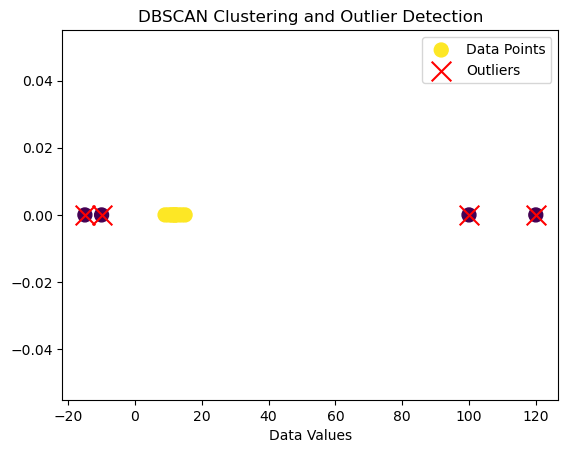

In [10]:
from sklearn.cluster import DBSCAN

def detect_outliers_dbscan(data, eps, min_samples):
    # eps: The maximum distance between two points to be considered as neighbors.
    # min_samples: The minimum number of points required to form a dense region (including the core point itself).
    data = np.array(data).reshape(-1, 1)
    model = DBSCAN(eps = eps, min_samples = min_samples)
    labels = model.fit_predict(data)
    outliers_indices = [i for i, label in enumerate (labels) if label == -1]
    return outliers_indices , labels 


#---------------------
#Example
#---------------------

outliers_dbscan, labels  = detect_outliers_dbscan(data, 1, 2)
for index in outliers_dbscan:
    print(f"index:{index}, value: {data[index]}")


#---------------------
# Plot the results
#---------------------
import matplotlib.pyplot as plt
print(labels)
data = np.array(data)
plt.scatter(data, np.zeros_like(data), c=len(), cmap='viridis', marker='o', s=100, label="Data Points")
plt.scatter(data[outliers_dbscan], np.zeros_like(data[outliers_dbscan]), c='red', marker='x', s=200, label="Outliers")
plt.title("DBSCAN Clustering and Outlier Detection")
plt.xlabel("Data Values")
plt.legend()
plt.show()

### Comparison of Anomaly Detection Methods

| Method            | Time Complexity       | Space Complexity     | Suitable For                            | Notes                                                                 |
|--------------------|-----------------------|-----------------------|-----------------------------------------|----------------------------------------------------------------------|
| **Z-Score**       | O(n)                 | O(1)                 | Numerical data (normally distributed)   | Simple and fast but sensitive to outliers in mean and standard deviation. |
| **IQR**           | O(n log n) (sorting) | O(1)                 | Numerical data (skewed distributions)   | Robust to extreme values but less effective for multi-dimensional data. |
| **Isolation Forest** | O(t × ψ log(ψ))     | O(t × ψ)             | High-dimensional, large-scale datasets | Handles non-linear and multi-dimensional data well; requires parameter tuning. |
| **DBSCAN**        | O(n²) or O(n log n)* | O(n)                 | Arbitrary-shaped clusters; spatial data | Effective for clusters of varying density; not ideal for very high-dimensional data. |



### Suitability Summary
- **Z-Score**: Simple and fast, good for clean numerical data.
- **IQR**: Robust to skewness, good for 1D numerical data.
- **Isolation Forest**: Handles complex, high-dimensional data.
- **DBSCAN**: Effective for spatial data and irregularly shaped clusters.
